## Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

# What is Machine Learning?

Field of study that gives computers the ability to learn without being explicitly programmed. Artur Samuels and checkers. Supervised Learning is the most widely used version.

#### When to Use Machine Learning

1. Problems for which existing solutions require a lot of hand-tuning or long list of rules. Machine Learning can usually perform this task easier
2. Complex problems for which there is no good solution at all for using a traditional approach. 
3. Fluctuating environments. Machine Learning can more easily adapt to new data.
4. Getting insights for large and complex amounts of data

#### Main Challenges of Machine Learning

1. Insufficient quantity of training data
2. Non-representative training data
3. Poor quality data
4. Irrelevant features
5. Over fitting and under-fitting the training data

#### Deep Learning

1. Deep Learning is a sub-class of Machine Learning, but with a higher level of complexity.
2. It's a layered sequence where the first layers are where you learn specific concepts and the deeper layers will use information already learned to soak in more abstract concepts
3. Fundamental advantage of Deep Learning is it can be trained on unstructured data

## Importing Dataset 

In [2]:
dataset = pd.read_csv("countriesvisited.csv")

In [3]:
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


## Separating X and Y Variables

In [4]:
#The first colon represents all the ROWS. The second colon represents all COLUMNS except the last one because of the -1

#In general, X is capitalized to show it's a Matrix

X = dataset.iloc[:,:-1].values

print(X) #There are two null values in this dataset

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [5]:
#Here we are selecting all ROWS and the last COLUMN

y = dataset.iloc[:, 3].values

print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


# Creating a Class to Remove Missing Values

In [6]:
#Axis = 0 involves columns
#Axis = 1 involves rows

imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)

imputer = imputer.fit(X[:, 1:3])

X[:, 1:3] = imputer.transform(X[:, 1:3])

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


# Creating a Class for Categorical Variables

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
#Here we are creating an object from our class

labelencoder_x = LabelEncoder()

In [10]:
#fit_transform is a method of the LabelEncoder class

#As you can see, we have converted the names of countries to numerical values. 

labelencoder_x.fit_transform(X[:,0])

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0])

In [11]:
#Here we are making sure that the column actually gets converted

X[:,0] = labelencoder_x.fit_transform(X[:,0])

In [12]:
#We have indeed done a successful conversion. The countries have turned to corresponding numbers

print(X)

[[0 44.0 72000.0]
 [2 27.0 48000.0]
 [1 30.0 54000.0]
 [2 38.0 61000.0]
 [1 40.0 63777.77777777778]
 [0 35.0 58000.0]
 [2 38.77777777777778 52000.0]
 [0 48.0 79000.0]
 [1 50.0 83000.0]
 [0 37.0 67000.0]]


One thing you have to be careful with conversion to categorical variables is how they will affect your model. For example, if Spain gets converted to "2" and France is "1" the model will assume Spain has a higher value than France even though it's simply just a category. The best way to get around this of course is to create DUMMY VARIABLES

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [14]:
#Creating an object from our class

#We are specifying the 0 index to make sure we are converting the first column

onehotencoder = OneHotEncoder(categorical_features = [0])

In [15]:
onehotencoder.fit_transform(X).toarray()

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [16]:
X = onehotencoder.fit_transform(X).toarray()

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [17]:
print(X)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 4.40000000e+01
  7.20000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 2.70000000e+01
  4.80000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 3.00000000e+01
  5.40000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.80000000e+01
  6.10000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 4.00000000e+01
  6.37777778e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.50000000e+01
  5.80000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.87777778e+01
  5.20000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 4.80000000e+01
  7.90000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 5.00000000e+01
  8.30000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.70000000e+01
  6.70000000e+04]]


In [18]:
#Here we are converting our y variable, or dependent variable, into numerics

#Unlike before with X variables it's ok to have y be purely numeric since our model will know its a dependent variable

labelencoder_y = LabelEncoder()

y = labelencoder_y.fit_transform(y)

In [19]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


# Splitting Dataset Into Training and Test Sets

We are going to split our data. This way our model will learn the correlations between X_train and y_train and then use those correlations to help predict the relationship between X_test and y_test

In [20]:
from sklearn.model_selection import train_test_split

The worst choice for splitting a dataset is 50-50!!!

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

# Feature Scaling

Feature Scaling or Standardization: It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

Real world dataset contains features that highly vary in magnitudes, units, and range. Normalisation should be performed when the scale of a feature is irrelevant or misleading and not should Normalise when the the scale is meaningful.

The algorithms which use Euclidean Distance measure are sensitive to Magnitudes. Here feature scaling helps to weigh all the features equally.

Formally, If a feature in the dataset is big in scale compared to others then in algorithms where Euclidean distance is measured this big scaled feature becomes dominating and needs to be normalized

Many times in machine learning you will not need to do feature scaling because the classes you import will already have feature scaling included in their algorithms

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc_X = StandardScaler()

In [24]:



#No need to add "fit" to the test set since it's already fitted
X_test = sc_X.transform(X_test)

You don't need to do Feature Scaling on the y variable in this example since this is a classification regression. However, other normal regressions may need scaling

# Regression Modeling

Regression models (both linear and non-linear) are used for predicting a real value, like salary for example. If your independent variable is time, then you are forecasting future values, otherwise your model is predicting present but unknown values. Regression technique vary from Linear Regression to SVR and Random Forests Regression.

Simple regression is just y = b0 + b1*x1. Y is the dependent variable. X is the independent variable. B0 is a constant (where the regression line crosses the vertical axis) and B1 is the coefficient. We are overall trying to find the line that is the best fit for the data. 

Ordinary Least Squares (OLS) = Sum of (yi - yhat)^2, and you want the minimum sum of those squares.

In [ ]:
Remember the assumptions of Linear Regression:
    1. Linearity (duh)
    2. Homoskedasticity
    3. Multivariate Normality
    4. Independence of Errors
    5. Lack of multicollinearity

In [25]:
salary = pd.read_csv("Salary_Data.csv")

In [26]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [27]:
#Here we are separating our independent (X) variable and dependent (y) variable

X2 = salary.iloc[:,:-1].values

In [28]:
y2 = salary.iloc[:,1].values

In [29]:
#Here we are just checking to see if our separation worked
#It did indeed. Here are all of the years experience

print(X2)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [30]:
#Here we are just checking to see if our separation worked
#It did indeed. Here are all of the salaries that correspond to years experience

print(y2)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


#### Training Set and Test Set

In [31]:
#Here we are splitting the dataset into a training set and test set for our model
#As you can see, "test size" of .3 means 30% of the data will be used for the test set and 70% for the training set

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = .3, random_state=0)

In [32]:
print(X_train)

[[ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


In [33]:
print(X_test)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]]


In [34]:
print(y_train)

[101302.  56642.  66029.  64445.  61111. 113812.  91738.  46205. 121872.
  60150.  39891.  81363.  93940.  57189.  54445. 105582.  43525.  39343.
  98273.  67938.  56957.]


In [35]:
print(y_test)

[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.]


#### Importing Linear Regression Libraries

In [36]:
from sklearn.linear_model import LinearRegression

#Here we are calling an object from our LinearRegression class
regressor = LinearRegression()

#Here we are fitting the linear regression model to our training set
#We will be using the fit method from the LinearRegression class
regressor.fit(X_train, y_train)

#We want our model to learn the correlations of the training set in order to predict the test set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
#Here we are setting up the PREDICTED values of salaries in our dataset (test set specifically)
y_pred = regressor.predict(X_test)

In [38]:
#Here we are printing out the PREDICTED values

print(y_pred)

[ 40817.78327049 123188.08258899  65154.46261459  63282.41035735
 115699.87356004 108211.66453108 116635.89968866  64218.43648597
  76386.77615802]


In [39]:
#Here we are printing out the actual test values
#Compare these values with the predicted values. How close are they?

print(y_test)

[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.]


# Plotting Our Regression

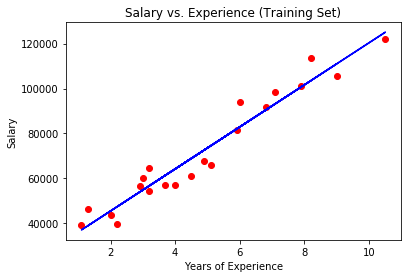

In [40]:
#Here we are plotting our real data, using the training set
#We want to plot the points, then plot the regression line that runs through
#We want to compare the actual data on the training set, to the predicted values derived from the training set

plt.scatter(X_train, y_train, color = "red")

plt.plot(X_train, regressor.predict(X_train), color = "blue")

#Here we are just simply labeling our graph
plt.title("Salary vs. Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

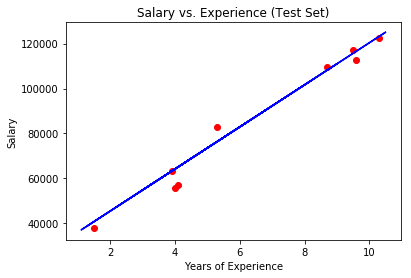

In [41]:
#Here we are plotting our real data, using the test set
#We want to plot the points, then plot the regression line that runs through
#We want to compare the actual data on the test set, to the predicted values derived from the training set (yes, still training set)

plt.scatter(X_test, y_test, color = "red")

plt.plot(X_train, regressor.predict(X_train), color = "blue")

#Here we are just simply labeling our graph
plt.title("Salary vs. Experience (Test Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

As you can see, our regression line fits the test set data very well. The line was trained with TRAINING DATA, so it has not seen the data points on the test set.

# Multiple Linear Regression

y = B0 + B1X1 + B2X2 + ...BnXn

#### Note on Dummy Variables

When creating Dummy Variables, you are essentially taking values from one column, and converting them to their own column!
For example, in the dataset below, we are taking the values from the column "State" and converting them to columns with each state name. Now, you wouldn't include both dummy variables in the equation. That's the dummy variable trap. You would simply have a column for New York, then 1=NY and 0=CA. Keep things clean and simple.

#### Note on p-values

What is a p-value?: https://www.mathbootcamps.com/what-is-a-p-value/    or    https://www.wikihow.com/Calculate-P-Value

#### Backward Elimination Version of Model Building

1. Select a significance level to stay in the model (.05 is standard)
2. Fit the full model with all possible predictors
3. Consider the predictor with the highest p-value. If p > sl, then step 4. Otherwise to finish
4. Remove the predictor that was higher than the significance level
5. Fit the model without this variable

#### Forward Selection Version of Model Building

1. Select a significance level to ENTER the model (.05 is standard)
2. Fit all simple regression models y ~ xn and select the one with the lowest p-value
3. Keep this variable and fit all possible models with one extra predictor added to the ones you already have
4. Consider the predictor with the lowest p-value. If p < sl, go to step 3!, otherwise finish

#### Bidirectional Version of Model Building

1. Select a significance level to enter AND stay in the model (.05 for both as an example)
2. Fit all simple regression models y ~ xn and select one with the lowest p-value
3. Fit the full model with all possible predictors
4. Consider the predictor with the highest p-value. If p > sl, then step 4. Otherwise to finish
5. Remove the predictor that was higher than the significance level
6. Fit the model without this variable

In [2]:
profits = pd.read_csv("50_Startups.csv")

In [3]:
profits.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#Separating X and y values
X = profits.iloc[:,:-1].values
y = profits.iloc[:, 4].values

In [5]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [6]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [7]:
#Time to create dummy variables for our states

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Creating an object from our class

#We are specifying the 3 index to make sure we are converting the fourth column
labelencoder_X = LabelEncoder()

X[:,3] = labelencoder_X.fit_transform(X[:, 3])

onehotencoder = OneHotEncoder(categorical_features = [3])

X = onehotencoder.fit_transform(X).toarray()

print(X)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05
  3.8319962e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04
  3.6616842e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04
  3.6286136e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05
  1.2771682e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.3029813e+05 1.4553006e+05
  3.2387668e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05
  3.1161329e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05
  3.0498162e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05
  2.2916095e+05]
 [1.0000000e+00 0.000

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [8]:
#Here we are just trying to avoid the dummy variable trap

X = X[:, 1:]

In [9]:
from sklearn.model_selection import train_test_split


#Here we are splitting the dataset into a training set and test set for our model
#As you can see, "test size" of .3 means 20% of the data will be used for the test set and 80% for the training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression

#Here we are calling an object from our LinearRegression class
regressor = LinearRegression()

#Here we are fitting the linear regression model to our training set
#We will be using the fit method from the LinearRegression class
regressor.fit(X_train, y_train)

#We want our model to learn the correlations of the training set in order to predict the test set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
y_pred = regressor.predict(X_test)

In [12]:
#Here we are predicting the profits. We will then compare the predicted profits to actual profits

print(y_pred)

[103015.20159796 132582.27760815 132447.73845175  71976.09851258
 178537.48221056 116161.24230166  67851.69209676  98791.73374687
 113969.43533013 167921.06569551]


In [13]:
print(y_test)

[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


In [14]:
#We need to add a column for the constant in the multiple linear equation
#Essentially we need a B0X0
#The stats model library is useful, but does not contain the constant column, hence why we add it

import statsmodels.formula.api as sm

#This is specifically a column of 50 "ones" since the constant will just multiply by one to keep its value
#The append function helps us add a new column to our dataset
X = np.append(arr =  np.ones((50,1)).astype(int), values = X, axis = 1)

In [15]:
print(X)

[[1.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [1.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05
  3.8319962e+05]
 [1.0000000e+00 1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04
  3.6616842e+05]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04
  3.6286136e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05
  1.2771682e+05]
 [1.0000000e+00 1.0000000e+00 0.0000000e+00 1.3029813e+05 1.4553006e+05
  3.2387668e+05]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05
  3.1161329e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05
  3.0498162e+05]
 [1.0000000e+00 1.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05
  2.2916095e+05]
 [1.0000000e+00 0.000

#### Backward Elimination Process for Profits Dataset

In [16]:
#We are going to create a separate set of X variables that are "high impact" based on our criteria
#First, we select a significance level needed to stay in the model. We will choose .05 to be simple
#Second, we fit the model with all possible predictors 
X_optimal = X[:,[0,1,2,3,4,5]]

regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()

In [17]:
#Here we are checking the p-values of our various X variables

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           1.34e-27
Time:                        12:35:11   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The highest p-value come from X2 at .99 so we are going to remove it

In [18]:
X_optimal = X[:,[0,1,3,4,5]]

regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()

In [19]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           8.49e-29
Time:                        12:35:16   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The highest p-value come from X1 at .94 so we are going to remove it

In [20]:
X_optimal = X[:,[0,3,4,5]]

regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()

In [21]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           4.53e-30
Time:                        12:35:21   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The highest p-value come from X2 at .602 so we are going to remove it

In [22]:
X_optimal = X[:,[0,3,5]]

regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()

In [23]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           2.16e-31
Time:                        12:35:24   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The highest p-value is .06. Just a note, you can't have a p-value of 0. All that 0 means is that the p-value is infinitesimally small.

In [24]:
X_optimal = X[:,[0,3]]

regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()

In [25]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           3.50e-32
Time:                        12:42:37   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So X1, which in this case is the fourth variable (R&D) from our orgininal model, has some predictive or explantory value for profits.

# Polynomial Regression

y = B0 + B1X1 + B2X1^2

Yes, you are using the same explanatory variable (X1), but with an exponential component to it. You should use polynomial regressions when the data do not contain a fully linear relationship. However, it is important to remember that this is still a linear regression because it can be expressed in linear terms. A non-linear regression would be something like y = (B0 + B1X1)/(B2X2-B3X3)

In [2]:
flowchart = pd.read_csv("Position_Salaries.csv")

In [3]:
flowchart.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
#Separating X and y values
#The reason you are including a range for X (1:2) is that it converts this range into a Matrix instead of a simple vector
#Remember that we need X to be a matrix in order to do our calculations
X = flowchart.iloc[:,1:2].values
y = flowchart.iloc[:,2].values

In [5]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [6]:
from sklearn.linear_model import LinearRegression

#Here we are calling an object from our LinearRegression class
lin_reg = LinearRegression()


#We will be using the fit method from the LinearRegression class
lin_reg.fit(X, y)

#For this part of the exercise we are first making a simple linear regression so you can compare it to the polynomial one
#No need for splitting into training and test sets for this part of the exercise

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
from sklearn.preprocessing import PolynomialFeatures

#Poly_reg will transform our X matrix into an X^2 matrix
poly_reg = PolynomialFeatures(degree = 2)

#We need to fit our object to X first, then transform it. Hence why we use "fit_transform"
X_poly = poly_reg.fit_transform(X)

In [8]:
print(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [9]:
#Now we are going to set up our Polynomial Regression

lin_reg2 = LinearRegression()

#See now we have switched from just regular X to a transformed X. y stays the same!
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

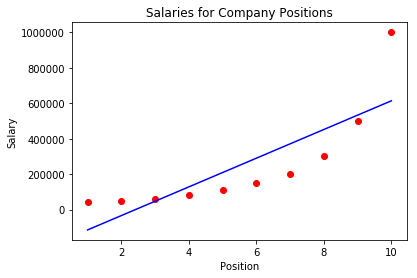

In [10]:
#Here we are plotting the real X and y values. 
plt.scatter(X, y, color = "red")

#Here we are plotting the regression line with predicted y values using standard linear regression
plt.plot(X, lin_reg.predict(X), color = "blue")

plt.title("Salaries for Company Positions")

plt.xlabel("Position")

plt.ylabel("Salary")

#This last part is necessary for Python to portray the graph
plt.show()

As you can see from the plot, our standard linear regession line does not fit the data very well, especially as people go higher up in position.

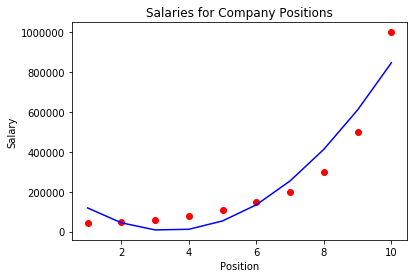

In [11]:
#Here we are plotting the real X and y values. 
plt.scatter(X, y, color = "red")

#Here we are plotting the regression line with predicted y values with POLYNOMIAL regression
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color = "blue")

plt.title("Salaries for Company Positions")

plt.xlabel("Position")

plt.ylabel("Salary")

#This last part is necessary for Python to portray the graph
plt.show()

Look at how much better our line fits the data now that we've transformed it using Polynomial Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures

#Here we are updating our degree from 2 to 3
poly_reg = PolynomialFeatures(degree = 3)

#We need to fit our object to X first, then transform it. Hence why we use "fit_transform"
X_poly = poly_reg.fit_transform(X)

#Now we are going to set up our Polynomial Regression

lin_reg2 = LinearRegression()

#See now we have switched from just regular X to a transformed X. y stays the same!
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

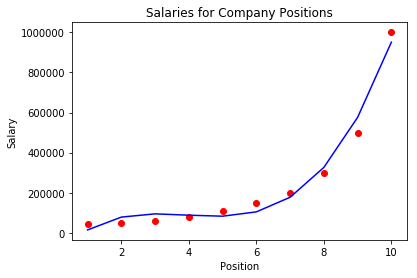

In [13]:
#Here we are plotting the real X and y values. 
plt.scatter(X, y, color = "red")

#Here we are plotting the regression line with predicted y values with POLYNOMIAL regression
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color = "blue")

plt.title("Salaries for Company Positions")

plt.xlabel("Position")

plt.ylabel("Salary")

#This last part is necessary for Python to portray the graph
plt.show()

By updating our degrees from 2 to 3, we get an even better line that fits the data!

In [14]:
from sklearn.preprocessing import PolynomialFeatures

#Here we are updating our degree from 3 to 4
poly_reg = PolynomialFeatures(degree = 4)

#We need to fit our object to X first, then transform it. Hence why we use "fit_transform"
X_poly = poly_reg.fit_transform(X)

#Now we are going to set up our Polynomial Regression

lin_reg2 = LinearRegression()

#See now we have switched from just regular X to a transformed X. y stays the same!
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

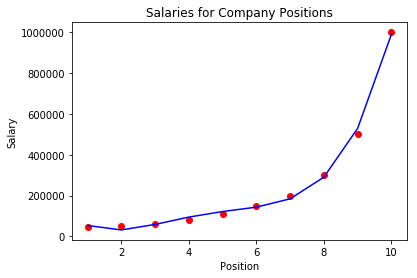

In [15]:
#Here we are plotting the real X and y values. 
plt.scatter(X, y, color = "red")

#Here we are plotting the regression line with predicted y values with POLYNOMIAL regression
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color = "blue")

plt.title("Salaries for Company Positions")

plt.xlabel("Position")

plt.ylabel("Salary")

#This last part is necessary for Python to portray the graph
plt.show()

Wow, by updating our polynomial degrees from 3 to 4 we found a line that perfectly fits the data. Amazing!

In [16]:
#X_grid will contain all the levels in the data
#It will help in visualizing results with higher resolution and smoother curves

X_grid = np.arange(min(X), max(X), .1)
X_grid = X_grid.reshape((len(X_grid), 1))

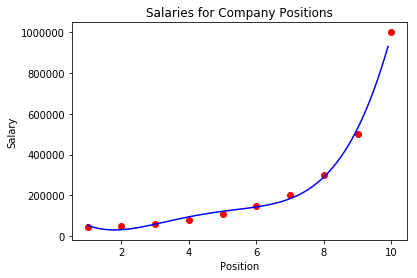

In [17]:
#Here we are plotting the real X and y values. 
plt.scatter(X, y, color = "red")

#Here we are plotting the regression line with predicted y values with POLYNOMIAL regression
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color = "blue")

plt.title("Salaries for Company Positions")

plt.xlabel("Position")

plt.ylabel("Salary")

#This last part is necessary for Python to portray the graph
plt.show()

If you have more than two dimensions you will not be able to plot graphs like above. You will have to find different ways to determine how well your lines fit the data.

In [20]:
#You can simply plug in a number into our equation if you want
#Here we want to predict the salary of someone who is on level 6.5 in the company
#A level 6.5 employee has a predicted salary of $330,379 using standard linear regression
lin_reg.predict([[6.5]])

array([330378.78787879])

In [21]:
#You can simply plug in a number into our equation if you want
#Here we want to predict the salary of someone who is on level 6.5 in the company
#A level 6.5 employee has a predicted salary of $158,862 using Polynomial Regression

lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])

# Support Vector Regression (SVR)

Support Vector Machines support linear and non-linear regression that we can refer to as SVR. Instead of trying to fit the largest possible street between two classes while limiting margin violations, SVR tries to fit as many instances as possible on the street while limiting margin violations. The width of the street is controlled by a hyper parameter Epsilon.

SVR performs linear regression in a higher dimensional space. Think of each data point in the training set as it's own dimension. When you evaluate your kernel between a test point and training point, the resulting value gives you the coordinate of your test point in that dimension. The vector we get when we evaluate the test point for all points in the training set is the representation of the test point in a higher dimensional space. Once you have that vector you use it to perform linear regression. 

Building a SVR:
    1. Collect a training set
    2. Choose a kernel and it's parameters as well as any regularization needed (smooths out noise in the data)
    3. Form the correlation matrix
    4. Train your machine, approximately or exactly, to get contraction coefficients
    5. Use those coefficients to create your estimator

SVR has a different goal from standard linear regression. In linear regression we are trying to limit the errors between the predictions and the real data. In SVR the goal is to make sure that errors do not exceed the threshold. 

In [2]:
position_level = pd.read_csv("Position_Salaries.csv")

In [3]:
position_level.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
#Separating X and y values
#The reason you are including a range for X (1:2) is that it converts this range into a Matrix instead of a simple vector
#Remember that we need X to be a matrix in order to do our calculations
X = position_level.iloc[:,1:2].values
y = position_level.iloc[:,2].values

In [5]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')

regressor.fit(X, y)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
y_pred = regressor.predict([[6.5]])

print(y_pred)

[130001.55760156]


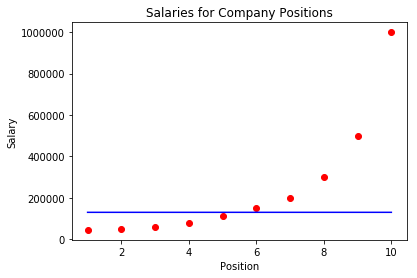

In [9]:
#Here we are plotting the real X and y values. 
plt.scatter(X, y, color = "red")

#Here we are plotting the regression line with predicted y values using standard linear regression
plt.plot(X, regressor.predict(X), color = "blue")

plt.title("Salaries for Company Positions")

plt.xlabel("Position")

plt.ylabel("Salary")

#This last part is necessary for Python to portray the graph
plt.show()

In [10]:
#Clearly our SVR model did not work
#So, it looks like we should do some feature scaling first, then re-run our model

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform([y])

In [11]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')

regressor.fit(X, y)

ValueError: bad input shape (1, 10)

# Decision Tree Regression

Classification Trees and Regression Trees. Overall, Decision Trees involve splitting up the data at unique places. In general a split is called a "leaf." The final leaves are called "terminal leaves." Think of "information entropy" when you think of decision trees. 

For example, let's say the first leaf is X1<20. The data will be split first on that criteria. Then, for all of those X1<20, the next split can happen at X2<200. The other split is if X1>20, then check if X2<170. Then the final split could be for all of those X2<170, see if X1<40. So you go back and forth between X1 and X2 for the criteria.

The predicted y-values for each of those splits will then be the average value of y for all of those splits on the actual data.

In [2]:
decision_tree = pd.read_csv("Position_Salaries.csv")

In [3]:
decision_tree.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
#Separating X and y values
#The reason you are including a range for X (1:2) is that it converts this range into a Matrix instead of a simple vector
#Remember that we need X to be a matrix in order to do our calculations
X = decision_tree.iloc[:,1:2].values
y = decision_tree.iloc[:,2].values

In [8]:
from sklearn.tree import DecisionTreeRegressor

dtr_reg = DecisionTreeRegressor(random_state = 0)

dtr_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [11]:
y_pred = dtr_reg.predict([[6.5]])

In [12]:
#The predicted result is below the actual data, but still close
print(y_pred)

[150000.]


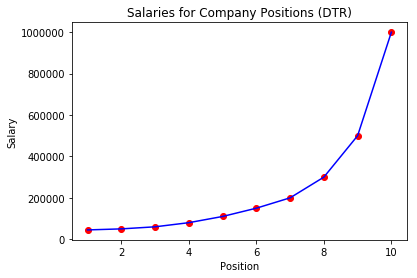

In [13]:
#Here we are plotting the real X and y values. 
plt.scatter(X, y, color = "red")

#Here we are plotting the regression line with predicted y values with Decision Tree regression
plt.plot(X, dtr_reg.predict(X), color = "blue")

plt.title("Salaries for Company Positions (DTR)")

plt.xlabel("Position")

plt.ylabel("Salary")

#This last part is necessary for Python to portray the graph
plt.show()

This chart is very misleading. The reason it draws basically a straight line between each point is that there are no predicted values to give at each point. Remember that DTR takes the AVERAGE of many points to make a prediction. Not just one single point. 

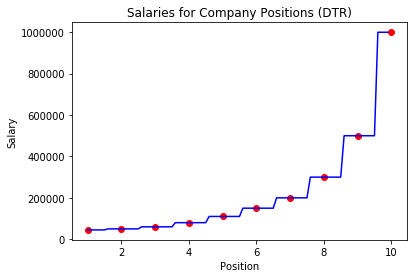

In [14]:
#X_grid will contain all the levels in the data
#It will help in visualizing results with higher resolution and smoother curves

X_grid = np.arange(min(X), max(X), .1)
X_grid = X_grid.reshape((len(X_grid), 1))


#Here we are plotting the real X and y values. 
plt.scatter(X, y, color = "red")

#Here we are plotting the regression line with predicted y values with Decision Tree regression
plt.plot(X_grid, dtr_reg.predict(X_grid), color = "blue")

plt.title("Salaries for Company Positions (DTR)")

plt.xlabel("Position")

plt.ylabel("Salary")

#This last part is necessary for Python to portray the graph
plt.show()

This is a much better visualization of how Decision Tree Regression looks when it is plotted. 

# Random Forest Regression

Ensemble Learning is basically when you take multiple algorithms and combine them. 

1. Pick at random K data points from the training set
2. Build the decision tree associated to these K data points
3. Choose the number of N-trees you want to build and repeat steps 1-2
4. For a new data point, make each of your N-trees predict the value of y for the data point in question. Then, assign the new data point the average across all of the predicted y-values.

Accuracy is better than just one decision tree since it takes the average of many predicted values. Ensemble algorithms are more stable because it's hard to change the outcome due to one change in the dataset whereas for just one Decision Tree if there's a change in the data there could be a big impact. 

In [2]:
random_forest = pd.read_csv("Position_Salaries.csv")

In [3]:
random_forest.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
#Separating X and y values
#The reason you are including a range for X (1:2) is that it converts this range into a Matrix instead of a simple vector
#Remember that we need X to be a matrix in order to do our calculations
X = random_forest.iloc[:,1:2].values
y = random_forest.iloc[:,2].values

In [15]:
from sklearn.ensemble import RandomForestRegressor

#n_estimators = amount of trees in our forest
rfr_reg = RandomForestRegressor(n_estimators = 300, random_state = 0)

rfr_reg.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [8]:
rfr_pred = rfr_reg.predict([[6.5]])

In [12]:
rfr_pred100 = rfr_reg.predict([[6.5]])

In [16]:
rfr_pred300 = rfr_reg.predict([[6.5]])

In [9]:
#With ten trees, the prediction is much better than just one tree from Decision Tree Regression

print(rfr_pred)

[167000.]


In [13]:
#With 100 trees, the prediction is much better than ten trees from Random Forest Regression

print(rfr_pred100)

[158300.]


In [17]:
#With 300 trees, the prediction is much better than 100 trees from Random Forest Regression
#Almost on the dot

print(rfr_pred300)

[160333.33333333]


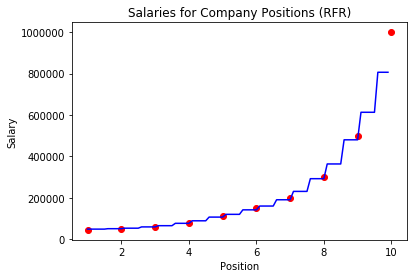

In [18]:
#X_grid will contain all the levels in the data
#It will help in visualizing results with higher resolution and smoother curves

X_grid = np.arange(min(X), max(X), .1)
X_grid = X_grid.reshape((len(X_grid), 1))


#Here we are plotting the real X and y values. 
plt.scatter(X, y, color = "red")

#Here we are plotting the regression line with predicted y values with Decision Tree regression
plt.plot(X_grid, rfr_reg.predict(X_grid), color = "blue")

plt.title("Salaries for Company Positions (RFR)")

plt.xlabel("Position")

plt.ylabel("Salary")

#This last part is necessary for Python to portray the graph
plt.show()

# Evaluating Regression Model Results

#### R-Squared

1. Sum of Squares of Residuals: sum(yi-yhat)^2
2. Total Sum of Squares: sum(yi-yavg)^2
3. R-Squared: 1 - (SSres/SStot)
4. To make this intuitive, think of the average line (basically horizontal) as our default trend line/model
5. Of course, we are trying to fit the BEST LINE
6. So, how does our line compare to the average line? R-squared measures that
7. R-squared values can be negative. If your model is worse than the average line, which is YIKES

#### Adjusted R-Squared

1. One problem with using R-Squared is the value increases as you add more variables. That obviously can be misleading. 
2. Adj R-squared: 1 - [(1 - R^2)(n-1/n-p-1)]
3. P is the number of regressors/variables. N is the sample size
4. Adjusted R-squared penalizes you for adding variables that don't help your model
5. When doing Backward Elimination or Forward Selection, don't just look at p-values. Look at Adjusted R-Squared.
6. If Adjusted R-squared is increasing, then keep adding variables. If not then stop. 

#### Interpreting Coefficients

1. Sign: If positive, then it is positively correlated with your dependent variable (duh)
2. Magnitude is tricky. Because variables are denominated in different units, just because one magnitude is larger than the other doesn't mean it's more important
3. It is better to think of PER UNIT analysis
4. For example, if R&D Spending is positively correlated with Profit at .79, that means every 1 unit increase in R&D increase Profit by .79

# Logistic Regression

1. Binary outcome. Yes/No. 1/0. 
2. Probability!
3. ln(P/(1-P)) = B0 + B1X1 is the basic function for Logistic Regression
4. You're still trying to find the "best fitting line" that explains the dependent variable

In [2]:
advertisements = pd.read_csv("Social_Network_Ads.csv")

In [3]:
advertisements.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
#Separating X and y values

X = advertisements.iloc[:,[2,3]].values
y = advertisements.iloc[:,4].values

In [11]:
from sklearn.model_selection import train_test_split


#Here we are splitting the dataset into a training set and test set for our model
#As you can see, "test size" of .25 means 25% of the data will be used for the test set and 75% for the training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

#No need to add "fit" to the test set since it's already fitted
X_test = sc_X.transform(X_test)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [17]:
#Here we are importing a FUNCTION
#Classes have capital letters so you can distinguish them from functions

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) 

In [18]:
print(cm)

[[65  3]
 [ 8 24]]


#### There is a part in this tutorial where he has code for mapping a Logistic Regression

# K-Nearest Neighbor (K-NN)

1. Choose the number K of neighbors
2. Take the K nearest neighbors of the new data point, according to Euclidean distance (https://en.wikipedia.org/wiki/Euclidean_distance)
3. Among these K neighbors, count the number of data points in each category (at least 2 categories)
4. Assign the new data point to the category where you counted the most neighbors
5. So, let's say we assign K = 5 neighbors. Then, we take the new data point and see how many neighbors it has in Category 1 vs.2
6. If our new data point has 3 neighbors in Category 1 and 2 in Category 2, then it will be assigned CATEGORY 1!!!
7. KNN is NOT a linear classifier

In [2]:
advertisementsknn = pd.read_csv("Social_Network_Ads.csv")

In [3]:
advertisementsknn.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#Separating X and y values

X = advertisementsknn.iloc[:,[2,3]].values
y = advertisementsknn.iloc[:,4].values

In [5]:
from sklearn.model_selection import train_test_split


#Here we are splitting the dataset into a training set and test set for our model
#As you can see, "test size" of .25 means 25% of the data will be used for the test set and 75% for the training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

#No need to add "fit" to the test set since it's already fitted
X_test = sc_X.transform(X_test)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
from sklearn.neighbors import KNeighborsClassifier

#For now we are going to create 5 neighbors
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)

classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
knn_pred = classifier.predict(X_test)

In [9]:
print(knn_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]


In [10]:
#Here we are importing a FUNCTION
#Classes have capital letters so you can distinguish them from functions

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knn_pred) 

In [11]:
#We have 7 incorrect predictions and 93 correct predictions
print(cm)

[[64  4]
 [ 3 29]]


# Support Vector Machines

1. Remember that during classification we want to create a boundary separating our outcomes
2. That way when we add more data, we will know how to classify them
3. Maximum Margin and Support Vectors
4. Imagine you are comparing apples and oranges.
5. In a standard ML model, the model will learn about apples based on the "most appely", and oranges on the "most orangey"
6. However, in SVM models, they learn based on which apples are the most like ORANGES and vice versa

In [3]:
advertisementssvm = pd.read_csv("Social_Network_Ads.csv")

In [4]:
advertisementssvm.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
#Separating X and y values

X = advertisementssvm.iloc[:,[2,3]].values
y = advertisementssvm.iloc[:,4].values

In [7]:
from sklearn.model_selection import train_test_split


#Here we are splitting the dataset into a training set and test set for our model
#As you can see, "test size" of .25 means 25% of the data will be used for the test set and 75% for the training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

#No need to add "fit" to the test set since it's already fitted
X_test = sc_X.transform(X_test)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)

classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
svm_pred = classifier.predict(X_test)

In [11]:
#Here we are importing a FUNCTION
#Classes have capital letters so you can distinguish them from functions

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, svm_pred) 

In [12]:
#Looks like we have 90 correct predictions and 10 wrong predictions
print(cm)

[[66  2]
 [ 8 24]]


# Kernel SVM

1. What happens when there are no clear boundaries between groups of data points?
2. Data points are not "linearly" separable
3. Sometimes when data can't be separated, you can transform it to a different dimension.
4. For example, converting f = x-5 to f = (x-5)^2 goes from 1D to 2D and creates a way to separate data points
5. This is known as "mapping" and you can find a mapping function to help transform data
6. One downside is mapping to another dimension can be highly compute-intensive

#### The Kernel Trick

1. Because mapping functions can be compute intensive, you have to find a workaround
2. We can apply a KERNEL function to help separate our data in a better manner
3. "Gaussian RBF Kernel"
4. We put a "landmark" in the middle of our datapoints
5. Then, we take the circumference of a circle around the landmark
6. Data points are separated by points inside the circle vs. ones outside
7. You have to find the right "sigma" to determine your circumference

#### Types of Kernel Functions

1. Gaussian RBF Kernel
2. Sigmoid Kernel
3. Polynomial Kernel

In [2]:
advertisementsknl = pd.read_csv("Social_Network_Ads.csv")

In [3]:
advertisementsknl.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
#Separating X and y values

X = advertisementsknl.iloc[:,[2,3]].values
y = advertisementsknl.iloc[:,4].values

In [6]:
from sklearn.model_selection import train_test_split


#Here we are splitting the dataset into a training set and test set for our model
#As you can see, "test size" of .25 means 25% of the data will be used for the test set and 75% for the training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

#No need to add "fit" to the test set since it's already fitted
X_test = sc_X.transform(X_test)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
from sklearn.svm import SVC

#The Kernel allows us to transform data to a higher dimension
#Then, we project back to the original data to continue our analysis
#RBF is the default kernel
classifierknl =  SVC(kernel = 'rbf', random_state = 0)

classifierknl.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
knl_pred = classifierknl.predict(X_test)

In [10]:
#Here we are importing a FUNCTION
#Classes have capital letters so you can distinguish them from functions

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knl_pred) 

In [11]:
#Looks like we have 93 correct predictions and 7 wrong predictions
print(cm)

[[64  4]
 [ 3 29]]


# Bayseian Analysis

1. Similar to Kernel Analysis, you choose a radius around a point and use it to determine it's feature
2. "This person has a 75% chance that they walk to work vs 25% chance they drive"
3. Classification on true probability - "Naive Bayes"
4. It's called "Naive Bayes" because it's based on ASSUMPTIONS, which obviously can be wrong

In [12]:
bayes_ads = pd.read_csv("Social_Network_Ads.csv")

In [13]:
bayes_ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
#Separating X and y values

X = bayes_ads.iloc[:,[2,3]].values
y = bayes_ads.iloc[:,4].values

In [15]:
from sklearn.model_selection import train_test_split


#Here we are splitting the dataset into a training set and test set for our model
#As you can see, "test size" of .25 means 25% of the data will be used for the test set and 75% for the training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

#No need to add "fit" to the test set since it's already fitted
X_test = sc_X.transform(X_test)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
bayes_pred = classifier.predict(X_test)

In [21]:
#Here we are importing a FUNCTION
#Classes have capital letters so you can distinguish them from functions

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, bayes_pred) 

In [22]:
#Looks like we have 90 correct predictions and 10 wrong predictions
print(cm)

[[65  3]
 [ 7 25]]


# Decision Tree Classification

1. CART: Classification and Regression Trees
2. Like with DTR, there will be splits in the data
3. Then, when you get to a certain split, your data will be encoded as 0-1 (Y/N, other binary outcomes)

In [2]:
dtc_ads = pd.read_csv("Social_Network_Ads.csv")

In [3]:
dtc_ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#Separating X and y values

X = dtc_ads.iloc[:,[2,3]].values
y = dtc_ads.iloc[:,4].values

In [6]:
from sklearn.model_selection import train_test_split


#Here we are splitting the dataset into a training set and test set for our model
#As you can see, "test size" of .25 means 25% of the data will be used for the test set and 75% for the training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=0)

Feature Scaling is necessary when your algorithm is based on Euclidean distance. In Decision Tree Classifcation, there is not Euclidean Distance, so feature scaling is not necessary.

In [7]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [8]:
dtc_pred = classifier.predict(X_test)

In [9]:
#Here we are importing a FUNCTION
#Classes have capital letters so you can distinguish them from functions

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, dtc_pred) 

In [10]:
#We have 9 incorrect predictions and 91 correct predictions
print(cm)

[[62  6]
 [ 3 29]]


# Random Forest Classification

1. Ensemble Learning: When you take multiple machine learning algorithms and put them together.
2. Random Forest method combines lots of Decision Tree methods
3. First, you pick at random K data points from the TRAINING set
4. Then, you build the decision tree associated to these K data points
5. Finally, you choose the number of trees you want to build and repeat the first two steps
6. For a new data point, make each one of your N-trees predict the category to which the data points belongs, and assign the new data point to the category that wins the majority vote
7. Microsoft Kinect uses Random Forest Classification to help with predicting body part movements

In [11]:
rfc_ads = pd.read_csv("Social_Network_Ads.csv")

In [12]:
rfc_ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
#Separating X and y values

X = rfc_ads.iloc[:,[2,3]].values
y = rfc_ads.iloc[:,4].values

In [14]:
from sklearn.model_selection import train_test_split


#Here we are splitting the dataset into a training set and test set for our model
#As you can see, "test size" of .25 means 25% of the data will be used for the test set and 75% for the training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=0)

In [15]:
#Remember that overfitting occurs when you fit too much data on the training set. 
#Creates large predictive capacity between training and test set

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
rfc_pred = classifier.predict(X_test)

In [17]:
#Here we are importing a FUNCTION
#Classes have capital letters so you can distinguish them from functions

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rfc_pred)

In [18]:
#Here we have 92 correct predictions and 8 wrong predictions
print(cm)

[[63  5]
 [ 3 29]]


# Evaluating Classification Model Performance

#### False Positives and False Negatives

1. False Positive: Type I Error. We predicted a Positive Outcome (1), but it was really negative (0)
2. False Negative: Type II Error: We predicted a Negative Outcome (0), but it was really positive (1)
3. In general, False Positives are seen as less dangerous than False Negatives
4. For example, if you predicted an earthquake, but it didn't happen, that's overall ok (you don't want an earthquake)
5. However, if you don't predict an earthquake, and it happens, it could be catastrophic because of lack of preparedness

#### The Confusion Matrix

1. Think of a square (a 2x2 Matrix) 
2. Y(Actual Outcome) on the Left, YHat(Predicted Outcome) on the Top
3. Both sides have 0-1 as the values for the outcomes
4. In the bottom right, the value is 1-1, meaning it was predicted positive and was actually positive (correct prediction)
5. The top left is 0-0, meaning it was predicted negative and was actually negative (correct prediction)
6. You sum these two corners together to get your total correct predictions from your model
7. In the top right, you have 0-1, meaning it is actually negative, but you predicted positive (FALSE POSITIVE)
8. In the bottom left, you have 1-0, meaning it was actually positive, but you predicted negative (FALSE NEGATIVE)
9. You sum these two corners together to get your total incorrect predictions
10. ACCURACY RATE = Correct Predictions/Total Predictions
11. ERROR RATE = Wrong Predictions/Total Predictions
12. Accuracy Paradox: You can shift all predictions into "actual" and get an increase in accuracy. This is why you have to be careful solely relying on the accuracy equation

#### Cumulative Accuracy Profile

1. Basically a curve that compares your model to a standard baseline (similar to R-squared intuition)
2. The larger the area under your curve as it relates to the default line, the better
3. Think of the following scenario: We are "cold calling" people to see if they want to purchase a stock
4. Of course, the more people you contact the better chance of getting buyers
5. So, the x-axis is amount of people you call, the y-axis is amount of people who buy the stock
6. However, every new person you contact comes at a cost (mainly time)
7. If you can create a model predicting which people would buy your stock that would save you a lot of time
8. If you can get 50 people out of 100 to buy a stock vs. 50 out of 1000 which would you choose?
9. NOTE: A ROC (Receiver Operating Characteristic) is not the same as a CAP
10. Accuracy Ratio: The area under the Perfect Model to Your Model divided by the area under Your Model to the Default Model
11. The closer the ratio is to 1 the better
12. Another way to assess this ratio is to go to the 50% contacted on the x-axis and see where that equates to on the y-axis for YOUR MODEL
13. If Y < 70%, that is not considered a good model
14. If Y between 70-80% that's good
15. If Y between 80-90% that's very good
16. If Y between 90-100% it's probably "too good", maybe overfitting is occurring

# K-Means Clustering

1. If you have "clusters" of data, K-Means Clustering can help you classify those individual clusters
2. First you choose the number K of clusters
3. Step 2, select at random K points the centroids (not necessarily from your data)
4. Step 3, assign each data point to the closest centroid, this forms a K-Cluster
5. Step 4, compute and place the new centroid of each cluster
6. Finally, reassign each data point to the new closest centroid. If any reassignment took place, go to Step 4, otherwise finish

#### Example K-Means Clustering Intuition

1. Step 1: We are choosing K = 2 clusters for our dataset
2. Step 2: Select at random the centroids, or K points
3. Step 3: We assign data points to the closest centroids
4. How do we know where it's closest to? Draw a line in between the 2 centroids, then draw a perpendicular line straight through that line. 
5. The points on each side of that perpendicular line will then correspond to the centroid
6. The distances are defined with Euclidean distance as a standard. You could use others hypothetically 
7. Step 4: Compute and place the new centroid of each cluster. 
8. So think of the new points added as having some gravitational pull to shift the old centroids to a new location
9. Step 5: Reassign each data point to the new closest centroid. If any reassignment took place, go to Step 4
10. For example, if a data point was originally on Centroid 1, but after reassignment shifted closer to Centroid 2, then go back to Step 4
11. This can keep going and going and going (iterative process)

#### Random Initialization Trap

1. The selection of random centroids at the beginning of the model can potentially dictate the outcomes of the clusters
2. This will ironically lead to *less* randomness, even though the intention of the centroids is to be random
3. One solution could be the K-Means++ algorithm

#### Choosing the Right Amount of Clusters

1. Within Cluster Sum of Squares or WCSS
2. You take the sum of squares around a centroid in your cluster and then add that to the sum of squares in a different cluster
3. You want to minizmize WCSS
4. Technically, you can have as many clusters as data points.
5. However, if you do that your WCSS will equal 0 and won't be worthwhile as a metric. It's too perfect
6. A great way to maintain balance is to use the "Elbow Method"
7. Plot WCSS on the y-axis and clusters on the x-axis
8. When the plot creates an angle resembling an elbow that's a good proxy for no longer increasing your clusters

In [2]:
mall_clusters = pd.read_csv("Mall_Customers.csv")

In [3]:
mall_clusters.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#For now, just creating our X variable
X = mall_clusters.iloc[:,[3,4]].values

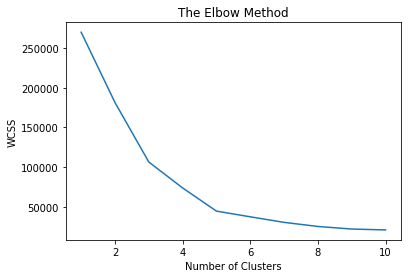

In [5]:
#Here, we are going to use the Elbow Method to help determine the optimal number of clusters

from sklearn.cluster import KMeans

wcss = []

#Remember we choose 11 not 10 because the range ends BEFORE the number dictated
#kmeans is an object, KMeans is the class
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the Elbow Method
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

#It looks like 5 Clusters is the optimal amount of clusters

In [6]:
#Applying K-Means++ to our dataset

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [8]:
#Here are the clusters we created.
#They do not go from 1-5, instead they go from 0-4
print(y_kmeans)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


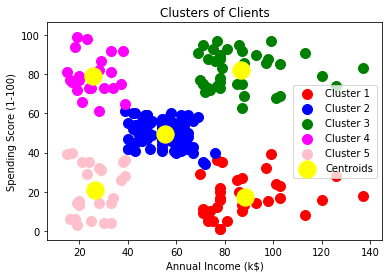

In [11]:
#Visualizing the clusters
#The second 0 is to indicate we want to start from the first column of our index
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, color = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, color = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, color = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, color = 'magenta', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, color = 'pink', label = 'Cluster 5')

#Visualizing the centroids in our clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, color = 'yellow', label = 'Centroids')
plt.title("Clusters of Clients")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# Hierarchical Clustering

1. Basically the same as K-Means Clustering, but a different process. Two types: Agglomerative and Divisive
2. Agglomerative Clustering Step by Step:
3. Step 1: Make each data point a single cluster that forms N clusters
4. Step 2: Take the two closest DATA POINTS and make them one cluster, so now N-1 clusters
5. Step 3: Again, take the two closest CLUSTERS and make them one cluster, so now N-2 clusters
6. Step 4: Keep repeating Step 3 until there is only one cluster
7. Remember that at Step 3 we are taking closest clusters, not closest data points. 
8. How do you measure the distance between two CLUSTERS?
9. You could do the closest distance between two points between the two clusters
10. You could take the two furthest points between the two clusters
11. You could take the average distance of all the points between the two clusters
12. You could take the distance between the centroids of the two clusters
13. HC is not necessarily better than K-Means for large data sets

#### Dendrograms

1. Dendrograms basically store memory of how hierarchical clustering occurs. They are based on within-cluster variance
2. The data points/clusters are on the x-axis of the dendogram and the distance between them is on the y-axis
3. So, you have a vertical bar representing the distance between two points, then a horizontal bar is used to connect the two points on the dendogram
4. As you iterate through each step, the bars will all begin to connect on the dendogram
5. It will look like a flowchart -> HIERARCHY
6. Then, once the hierarchy is created, you can set individual thresholds to determine how many clusters you want
7. This threshold is shown via a long horizontal line that goes across the entire chart
8. One rule of thumb is to find the parallel vertical lines with the largest distance that DOESNT cross another horizontal line. Then you insert the threshold through that line to determine how many clusters to use

In [2]:
mall_clustershc = pd.read_csv("Mall_Customers.csv")

In [3]:
mall_clustershc.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#For now, just creating our X variable
X = mall_clustershc.iloc[:,[3,4]].values

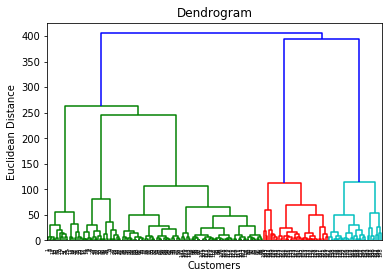

In [5]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

Going by our rule of thumb we will have 5 clusters

In [6]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X)

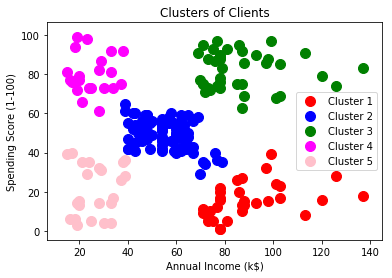

In [7]:
#Visualizing the hierarchical clusters
#The second 0 is to indicate we want to start from the first column of our index
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, color = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, color = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, color = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, color = 'magenta', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, color = 'pink', label = 'Cluster 5')

#Adding finishing steps to our chart
plt.title("Clusters of Clients")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# Apriori

1. Part of Association Rule Learning
2. Why did people who bought beer also buy diapers? Think Netflix and Amazon recommendations
3. Support, Confidence, Lift
4. Support: Total Users out of Total Potential Users for Item 1 (Example 10/100 have seen Movie A so 10%)
5. Confidence: How many people who have seen Movie B have also seen Movie A? (Example 7/40 so 17.5%)
6. Lift:Confidence/Support. So 17.5%/10% = 1.75
7. Overall Steps:
    8. Step 1: Set a minimum support and confidence
    9. Step 2: Take all the subsets in transactions having higher support than minimum support
    10. Step 3: Take all the rules of these subsets having higher confidence than minimum confidence
    11. Step 4: Sort the rules by decreasing lift
8. LIFT is the best metric to measure the relevance of a rule

In [2]:
grocery = pd.read_csv('Market_Basket_Optimisation.csv')

In [3]:
grocery.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you can see, Python mistook the grocery items as headers. In order to fix that we can just import the dataset differently

In [4]:
grocery = pd.read_csv('Market_Basket_Optimisation.csv', header = None)

In [5]:
grocery.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So, each row of data has the groceries that a certain customer bought. Can we find relationships between items they bought?

In [7]:
transactions = []

for i in range(0,7501): #i corresponds to all ROWS
    transactions.append([str(grocery.values[i,j]) for j in range(0,20)]) #j corresponds to all COLUMNS

In [9]:
print(transactions[1])

['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']


In [29]:
#NOTE: Must install apyori in Anaconda Prompt
from apyori import apriori

#Min support calcuated by (3*7)/7500. If a product is purchased 3x a day, that means 21 times per week

#Confidence highlights how right our rules have to be
#Confidence of .8 means the rules have to be correct 80% of the time
#Sometimes too high confidence is bad because you don't get actual relationships
#For example, most people buy bread at the gorcery store, if you set confidence too high you will get lots of relationships with bread
#Those aren't actual relationships though since bread is a default item. You want specific associations


rules = apriori(transactions, min_support =.003, min_confidence = .2, min_lift = 3, min_length = 2)

In [30]:
results = list(rules)

In [31]:
print(results)

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]), RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]), RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]), RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0.24

It looks like the top relevant rule is the association between "chicken" and "light cream"

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])

# Eclat

##### Example Done on R

1. Eclat model is Association Rule Learning as well
2. In the Eclat model we only have Support. Not Confidence or Lift
3. We start looking more at sets of items, not one individual item
4. For example, how many "Best Movies 2019" contained BOTH Movie A and Movie B, not just one or the other
5. Overall Steps:
    6. Set a minimum support
    7. Take all the subsets in transactions having higher support than minimum support
    8. Sort these subsets by decreasing support

# Upper Confidence Bound

1. Part of Reinforcement Learning
2. One Armed Bandit vs. Multi-Armed Bandit (Bandits are slot machines at casinos)
3. Each individual machine has a different distribution of outcomes, which are unknown to you the player
4. How do you figure out which machine has the best distribution of outcomes for you? You need to explore and exploit
5. You could either spend too little time or too much time exploring the outcomes
6. Ad agencies do something similar trying to figure out which ad works best. They could do A-B testing, but not as efficient.
7. So, we initially create a baseline level of distribution, since once again we don't know the actual distributions
8. Our goal is created a confidence area around that baseline level that will hopefully include the individual distributions
9. THEN, we test out each machine/ad/etc. 
10. If there is a negative effect, we shift the boundary area down for that item
11. If there is a positive effect, we shift the boundary area up for that item
12. Over time, these confidence areas not only shift, but they shrink since we start to know what their distributions are

In [2]:
ucb_data = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
#Our data seems to be a list of 10 ads and whether they worked or not (1-0)

ucb_data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
#Implementing random selection of 10 ads
#We are using this as a baseline comparison to the total reward we get when we use UCR

import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = ucb_data.values[n, ad]
    total_reward = total_reward + reward

In [5]:
#The total reward calculated from random selection is 1244
print(total_reward)

1244


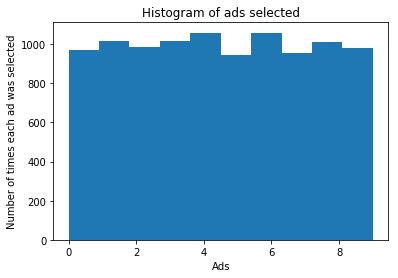

In [6]:
#Visualizing the results of our random selection
#Because we did random selection of ads, our histogram is nearly uniform
#UCR will help us focus on more rewarding ads, and thus our new histogram should be more skewed

plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

#### Implementing UCB

In [7]:
import math

#First we create just a vector of zeros and their rewards
#This represents the "first round" since obviously nothing is selected yet
number_of_selections = [0] * d
sums_of_rewards = [0] * d

#Here we are setting up every round after the first
#Essentially the first ten rounds we select each ad once (since there's 10 ads)
N = 10000
d = 10 
ads_selected = []
total_reward = 0
for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (number_of_selections[i] > 0):
            avg_reward = sums_of_rewards[i]/number_of_selections[i] #This is the avg reward of "i" up to round "N"
            delta_i = math.sqrt((3/2) * math.log(n+1))/number_of_selections[i] #This is our confidence interval
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
        ads_selected.append(ad)
        number_of_selections[ad] = number_of_selections[ad] + 1
        reward = ucb_data.values[n, ad]
        sums_of_rewards[ad] = sums_of_rewards[ad] + reward
        total_reward = total_reward + reward

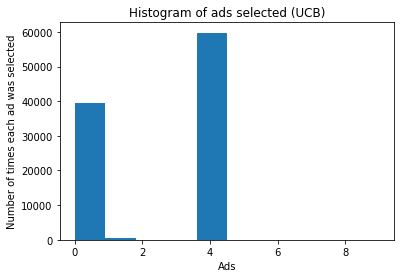

In [8]:
#Visualizing our UCB Algorithm
#Look at how different this is. Huge skews on Ads #1 and #4

plt.hist(ads_selected)
plt.title("Histogram of ads selected (UCB)")
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# Thompson Sampling

1. We construct distributions of where we think the expected value might lie
2. We are not trying to guess the distributions behind the bandit machines
3. Thompson Sampling is a PROBABILISITC Algorithm
4. UCB is a DETERMINISTIC Algorithm
5. On the x-axis you have total returns from the bandit
6. Each time you pull the levers of each bandit per round, you take the highest return and use that as your sample return
7. Keep going round by round till you start to understand the actual distributions of the expected value
8. In other words, the distributions should narrow
9. UCB requires an update after each round. Thompson Sampling can accomodate delayed feedback

In [2]:
ts_data = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
ts_data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


#### Implementing Thompson Sampling

In [5]:
#Thompson Sampling is very similar to UCB. There just needs to be a few changes
#Importing Random library instead of Math library
import random

#Here we are setting up every round after the first
#Essentially the first ten rounds we select each ad once (since there's 10 ads)
N = 10000
d = 10 
#Here are the first two changes from the UCB algorithm
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
ads_selected = []
total_reward = 0
for n in range(0,N):
    ad = 0
    max_random = 0 #Here is another change. Max random draw since remember we take many samples
    for i in range(0, d):
        #Here is the biggest change. We go from a upper bound to many sample draws
        random_beta = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1 )
        if random_beta > max_random:
            max_random = random_beta
            ad = i
        ads_selected.append(ad)
        reward = ts_data.values[n, ad]
        if reward == 1:
            number_of_rewards_1[ad] = number_of_rewards_1[ad] + 1
        else:
            number_of_rewards_0[ad] = number_of_rewards_0[ad] + 1
        total_reward = total_reward + reward

In [7]:
#Our total reward using Thompson Samping is 22761, quite large
print(total_reward)

22761


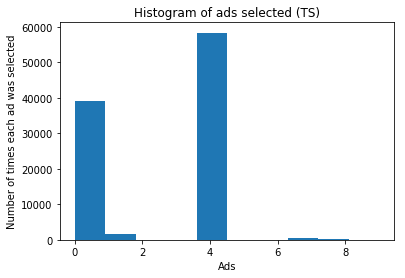

In [6]:
#Visualizing our Thomspon Sampling Algorithm
#Look at how different this is. Huge skews on Ads #1 and #4

plt.hist(ads_selected)
plt.title("Histogram of ads selected (TS)")
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# Natural Language Processing 

1. Natural Language Processing (or NLP) is applying Machine Learning models to text and language.
2. Whenever you dictate something into your iPhone/Android that is then converted to text, that's an NLP algorithm in action
3. Sentiment Analyis: Identifying the mood or subjective opinions within large amounts of text, including average sentiment and opinion mining
4. You can use NLP to predict answers to questions
5. Use NLP for translations or speech recognition
6. You can even use NLP for document summarization
7. Bag of Words model

In [2]:
#A tsv file simple means the data is separated by TABS, not COMMAS
#We already have commas in the restaurant reviews, so it'll be better to use the Tab file
#You still use pd.read_csv to import the file though
#Quoting allows use to ignore the double quotes in the reviews

nlp_data = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
nlp_data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
#First thing we will do is clean the text to make it easier to analyze
import re

#Here we just want to keep the letters. No numbers, no punctuation
#We are going to clean the first entry in our dataset just to get a glance at what occurs
#We are replacing the removed characters with a space, that's what the ' ' is for
review = re.sub('[^a-zA-Z]', ' ',nlp_data['Review'][0])

In [5]:
#As you can see, the three dots were removed and replaced with three spaces. 

print(review)

Wow    Loved this place 


In [6]:
#Here we are going to convert the capital letters into lower case letters

review = review.lower()

print(review)

wow    loved this place 


In [7]:
#Here we are going to remove all of the "irrelevant" words from the reviews
#We only want words that convey emotion, not 'the', 'or', etc

import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kalstedh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
#This will convert our review into a list of the separate words that make up the review
review = review.split()

print(review)

['wow', 'loved', 'this', 'place']


In [9]:
from nltk.corpus import stopwords

In [11]:
#Here we are going through all of the words that are not already in our stopwords list from the nltk library
#We convert the stopwords from a list to a set because Python can review sets faster than lists
review = [word for word in review if not word in set(stopwords.words('english'))]

In [12]:
#As you can see, "this" was removed from the review
print(review)

['wow', 'loved', 'place']


In [10]:
#Here we are going to see if we can do cleaning in one fell swoop
#We will restart the process
#This library will simplify our words

from nltk.stem.porter import PorterStemmer
#Creating our object from class PorterStemmer
ps = PorterStemmer()


In [11]:
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

#As you can see, "loved" has become 'love'. It's a small change, but just shows what matters
print(review)

['wow', 'love', 'place']


In [12]:
#Now that we've cleaned the review up, it's time to put it back together

review = ' '.join(review)

print(review)

wow love place


In [4]:
#Now we are going to apply the cleaning process to the entire dataset
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#Creating our object from class PorterStemmer
ps = PorterStemmer()

corpus = []

for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ',nlp_data['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kalstedh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#Look at how the individual reviews have changed
corpus[0:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

#### Bag of Words Model

1. We are basically going to take all the words in our cleaned dataset and convert them to columns
2. We will still have the cleaned reviews in same rows, so in this case 1000 rows will remain in tact
3. There will just be a lot more columns now
4. Then, below the column for each word, a number will be in the column that says how many times that word appears in each review
5. Essentially we are creating a Sparse Matrix since our new dataset will contain lots of zeroes (sparsity)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

#Creating an object of the class
cv = CountVectorizer()

#Here we are creating our Sparse Matrix
X = cv.fit_transform(corpus).toarray()

In [10]:
#So X has 1000 rows as needed, and 1565 columns
X.shape

(1000, 1565)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

#Creating an object of the class
#Here we are going to limit the features to 1500 to make it a cleaner matrix
cv = CountVectorizer(max_features = 1500)

#Here we are creating our Sparse Matrix
X = cv.fit_transform(corpus).toarray()

In [12]:
X.shape

(1000, 1500)

In [13]:
#Here we are setting up our dependent variable
#1-0 for whether it was a "Like" or not

y = nlp_data.iloc[:, 1].values

In [14]:
from sklearn.model_selection import train_test_split


#Here we are splitting the dataset into a training set and test set for our model
#As you can see, "test size" of .25 means 20% of the data will be used for the test set and 80% for the training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [15]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [18]:
#Our machine learning model made 146 correct predictions and 54 incorrect predictions of restaurant reviews
print(cm)

[[55 42]
 [12 91]]


In [19]:
#Accuracy of Model
(55+91)/200

0.73

# Deep Learning

#### Basic Background

1. For Deep Learning, you have an input layer and an output layer
2. There can be several input values per input layer, usually just one output value per output layer
3. Trying to replicate neurons in the brain
4. There's a "hidden" layer in-between the input and output layers
5. For "Deep Learning" there are lots of hidden layers in between
6. In the 1950s hardware was around three thousand for 5 megabytes. In the 80s it was around four thousand for 10 megabytes, now it's basically $150 for 256 GIGAbytes. That's 256,000 megabytes!!!!
7. In fact, now you can have Cloud Storage on things like DropBox and Google Drive that don't cost you anything!!!

#### Deep Learning models can be used for a variety of complex tasks:

1. Artificial Neural Networks for Regression and Classification
2. Convolutional Neural Networks for Computer Vision
3. Recurrent Neural Networks for Time Series Analysis
4. Self Organizing Maps for Feature Extraction
5. Deep Boltzmann Machines for Recommendation Systems
6. Auto Encoders for Recommendation Systems

#### The Neuron

1. Neurons have axons and dendrites
2. Dendrites are branched projections of neurons. They are protoplasmic extensions of nerve cells, and operate as conductors of electrochemical stimuli received from neighboring cells. The impulses they receive are carried inwards and towards the soma, or cell body.
3. Impulses are received by dendrites via synapses. They are situated at different points all over the dendritic arbor.
4. Axons are also called nerve fibers, as they appear elongated and slender. Like dendrites, they are also protoplasmic projections of nerve cells, or neurons, and their primary purpose is to conduct electrochemical impulses away from the cell body of neurons. Most nerve cells only have a single axon.
5. Basically, axons’ role is to transmit signals, and dendrites to receive such signals.
6. For your input layers, they are independent variables from ONE observation. So let's say Bob is the observation, then his height, age, and income are all variables. Your neurons process this information
7. These independent variables can either be normalized or standardized. 
8. After standardization/normalization, these variables are given "weights" through the synapse before they enter the neuron
9. Within the neuron, the first step is adding the weighted values all together. Then an Activation Function is applied. Afterwards the neuron passes on the fully filtered information

#### The Activation Function

1. Threshold Function: Yes/No, 0-1 type of function. Very simple. Good if your dependent variable is binary
2. Sigmoid Function: More smooth and probabilistic than the Threshold Function. Good if your dependent variable is binary
3. Rectifier Function: One of the most used functions
4. Hyperbolic Tangent Function: Similar to Sigmoid Function, but goes below 0

#### What is a Neural Network?

1. Most of our networks should be expansive
2. Let's envision several independent variables dealing with housing (area, distance to transportation, bedrooms, etc)
3. Let's also envision multiple NEURONS that will process the independent variables
4. What happens is each neuron is responsible for a different COMBO of the variables
5. For example, Neuron 1 can take on area + bedrooms. Neuron 2 can do area + distance to transportation
6. Yes, the variables can overlap for each neuron
7. Let's envision our dependent variable to be price
8. Once we get some predicted values, we measure those against actual values using a cost function
9. The goal is to minimize the cost function. If the cost function is too high then information is sent back and the WEIGHTS are adjusted
10. We then go through the filtering process again. 

#### Gradient Descent

1. What is the fastest way to find the best weights/reduce our cost function?
2. Normal Gradient Descent vs. Stochastic Gradient Descent
3. Normal is when you analyze the entire batch itself and adjust the weights
4. Stochastic is when you go row by row and adjust the weights per row
5. Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. 
6. In machine learning, we use gradient descent to update the parameters of our model.
7. The size of these steps is called the learning rate. 
8. With a high learning rate we can cover more ground each step, but we risk overshooting the lowest point since the slope of the hill is constantly changing. 
9. With a very low learning rate, we can confidently move in the direction of the negative gradient since we are recalculating it so frequently. 
10. A low learning rate is more precise, but calculating the gradient is time-consuming, so it will take us a very long time to get to the bottom.

#### Backpropagation

1. Backpropagation, short for "backward propagation of errors," is an algorithm for supervised learning of artificial neural networks using gradient descent. 
2. Given an artificial neural network and an error function, the method calculates the gradient of the error function with respect to the neural network's weights. 
3. It is a generalization of the delta rule for perceptrons to multilayer feedforward neural networks.
4. The beauty is we can adjust all of the weights simultaneously

#### Overall Steps of Stochastic Gradient Descent

1. Randomly initialize the weights to small numbers close to 0, but NOT 0
2. Then, input the first observation in your dataset in the input layer. Each feature in one input node
3. Forward-Propagation: From left to right, the neurons are activated in a way that the impact of each neuron's activation is limited by the weights. Propagate the activations until getting the predicted results (y)
4. Compare the predicted result to the actual result and measure the generated error
5. Back-Propagation: From right to left, the error is back-propagated. Update the weights according to how much they are responsible for the error. The learning rate decides by how much we update the weights.
6. Reinforcement Learning: Repeat Steps 1-5 and update the weights after each observation
7. Batch Learning: Repeat Steps 1-5 and update the weights after each BATCH of observations

#### Installing Keras

1. Use code below in Anaconda Prompt
2. conda install -c conda-forge keras
3.GPUs much more powerful than CPUs, make sure you understand the difference
4.GPUs better for neural networks

In [2]:
business = pd.read_csv('Churn_Modelling.csv')

In [3]:
business.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Separating X and y values

#We need columns 3-12, so we go up to 13 since the bound does not go all the way to 13, it goes to 12
#Matrix of X features created
X = business.iloc[:, 3:13].values
y = business.iloc[:, 13].values

In [5]:
#Encoding categorical variables
#We have Country and Gender as categorical variables in our dataset
#First we convert them into numbers (0,1,etc.)
#Then, we make sure those numbers are ordinal and not cardinal since they are not rankings (male not better than female)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()

X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

labelencoder_X_2 = LabelEncoder()

X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])


onehotencoder = OneHotEncoder(categorical_features = [1])

X = onehotencoder.fit_transform(X).toarray()

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [6]:
#Avoiding dummy variable trap

X = X[:,1:]

In [7]:
#Splitting training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [8]:
#Feature scaling is almost necessary for deep learning
#It will allow for computations to run more efficiently

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

#No need to add "fit" to the test set since it's already fitted
X_test = sc_X.transform(X_test)

In [9]:
import keras

Using TensorFlow backend.


In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
#Future ANN we are going to build

ann_classifier = Sequential()

In [12]:
#Here we are building our first Hidden Layer
#Input Dim needs to be specified because no layer has been created yet
#Our 11 input nodes are simply our 11 independent variables
#Relu is the rectifier activation function
ann_classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  


In [13]:
#Here we are building our second Hidden Layer
#No Input Dim is needed since we already established our first Hidden Layer
ann_classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
#Here we are adding our Output Layer
#Change the Output Dim to 1 since there is only one outcome
#We need to change the activation function from Relu (rectifier) to Sigmoid
ann_classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [15]:
#Here we are compling the entire ANN
ann_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
#Now we are going to fit our ANN to our training set
ann_classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Epoch 1/100
8000/8000 [==============================] - 2s 194us/step - loss: 0.4830 - accuracy: 0.7959
Epoch 2/100
8000/8000 [==============================] - 1s 133us/step - loss: 0.4293 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 135us/step - loss: 0.4244 - accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 136us/step - loss: 0.4208 - accuracy: 0.8181
Epoch 5/100
8000/8000 [==============================] - 1s 137us/step - loss: 0.4186 - accuracy: 0.8236
Epoch 6/100
8000/8000 [==============================] - 1s 139us/step - loss: 0.4158 - accuracy: 0.8257
Epoch 7/100
8000/8000 [==============================] - 1s 136us/step - loss: 0.4139 - accuracy: 0.8305
Epoch 8/100
8000/8000 [==============================] - 1s 137us/step - loss: 0.4125 - accuracy: 0.8309
Epoch 9/100
8000/8000 [==============================] - 1s 137us/step - loss: 0.4109 - accuracy: 0.8329
Epoch 10/100
8000/8000 [==============================

In [17]:
#Here we are setting our threshold as .5, which is basically a default
#For things like medical trials we would most likely increase the threshold

y_pred = ann_classifier.predict(X_test)

y_pred = (y_pred > 0.5)

In [18]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [20]:
#We have 1682 correct predictions and 318 incorrect predictions
print(cm)

[[1555   40]
 [ 278  127]]


In [21]:
#Accuracy of our model, 84% accuracy
(1555+127)/2000

0.841

#### Convolutional Neural Networks

1. Input image -> CNN -> Output image
2. Example: smiley face -> CNN -> "happy"
3. Convolution -> Max Pooling -> Flattening -> Full Connection
4. Convolution: Input image, feature detector, feature map. The feature detector moves over the input image 
    and creates a feature map. The feature map is a "shrunken" version of the input image.
5. ReLU Layer (Rectified Linear Unit): Want to increase non-linearity in our network, especially since images tend to be 
    non-linear.The function is linear for values greater than zero, meaning it has a lot of the desirable properties 
    of a linear activation function when training a neural network using backpropagation. Yet, it is a nonlinear function 
    as negative values are always output as zero
6. Max Pooling: Takes you from the Feature Map to the Pooled Feature Map. Largest numbers on Feature Map represent greatest 
    resemblance to image. Pooled Feature Map dilutes the Feature Map's size and parameters. This helps processing and 
    limits overfitting. There's also Mean/Average Pooling, other forms of Pooling. 
7. Flattening: Flatten the Pooled Feature Map into a column. The column becomes an input layer for a future ANN/CNN. 
8. Full Connection: Connecting the whole network together. The objective of a fully connected layer is to take the results of 
     the convolution/pooling process and use them to classify the image into a label (in a simple classification example). 
     The fully connected part of the CNN network goes through its own backpropagation process to determine the most 
     accurate weights.Each neuron receives weights that prioritize the most appropriate label. 
     Finally, the neurons “vote” on each of the labels, and the winner of that vote is the classification decision.
9. Softmax Function: Softmax function takes an N-dimensional vector of real numbers and transforms it into a vector of 
    real number in range (0,1) which add up to 1.  
10. Cross-Entropy Function: Cross entropy indicates the distance between what the model believes the output distribution 
    should be, and what the original distribution is. Cross entropy measure is a widely used alternative of squared error. 
    It is used when node activations can be understood as representing the probability that each hypothesis might be true,
    i.e. when the output is a probability distribution. Thus it is used as a loss function in neural networks which 
    have softmax activations in the output layer.

In [2]:
#Importing libraries to build CNN

import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
#Initializing the CNN

cnn_classifier = Sequential()

In [4]:
#Adding the Convolutional Layer
#We are creating 32 feature detectors with 3x3 dimensions
#meaning our Convolutional Layer will have 32 feature maps

cnn_classifier.add(Convolution2D(32,3,3, input_shape = (64,64,3), activation = 'relu'))

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """


In [6]:
#Adding the Pooling Layer
#Default is usually 2x2 because we want to try to be precise on picking up the import features from the Convolutional Layer
#So the size of our feature map will be divided by 2

cnn_classifier.add(MaxPooling2D(pool_size = (2,2)))

In [7]:
#Flattening the Pooled Feature Map into an Input Layer of a future ANN

cnn_classifier.add(Flatten())

In [8]:
#Fully connecting the layers in our CNN
#The Fully Connected Layer is a hidden layer between the input and output layers
#Output Dim is the number of nodes in the hidden layer
#No true rule of thumb for determining amount of nodes in Hidden Layer
#However, common practice is to choose a number BETWEEN the number of input nodes and output nodes

cnn_classifier.add(Dense(output_dim = 128, activation = 'relu'))

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  import sys


In [9]:
#Creating our Output Layer
#We are using the Sigmoid Function because of our binary outout (cats vs. dogs)
#If we had more than 2 categories we would use the Softmax Function

cnn_classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  """


In [10]:
#Compiling the full CNN

cnn_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
#Fitting the CNN to our images

from keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

cnn_classifier.fit_generator(
        training_set,
        samples_per_epoch=8000,
        epochs=25,
        validation_data=test_set,
        validation_samples=2000)

# Dimensionality Reduction

There are two types of Dimensionality Reduction techniques:
1. Feature Selection: Backward Elimination, Forward Selection, Bidirectional Elimination, Score Comparison
2. Feature Extraction: Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), Kernel PCA, Quadratic Discriminant Analysis (QDA)

#### Principal Component Analysis (PCA)

1. Used for noise filtering, visualization, feature extraction, stock market predictions, gene data analysis
2. Goal is to identify patterns in data and detect correlation between variables
3. Reduce the dimensions of a d-dimensional dataset by projecting it onto a k-dimensional subspace where k < d
4. Standardize the data
5. Obtain the Eigenvectors/Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition
6. Sort Eigenvalues in descending order and choose the (k) Eigenvectors that correspond to the (k) largest Eigenvalues 
    where k is the number of dimensions of the new feature subspace (k <= d)
7. Construct projection matrix W from selected k Eigenvectors
8. Transform the original dataset X via W to obtain a k-dimensional feature subspace Y
9. Essentially learn about the relationship between X and Y values and find a list of principal axes
10. Highly affected by outliers in the data so be careful about that
11. From the (m) independent variables of your dataset, PCA extracts p<=m new independent variables that explain 
    most of the variance of the dataset regardless of the dependent variable
12. PCA is an unsuperivsed model since the dependent variable is not involved

In [2]:
wine_pca = pd.read_csv("Wine.csv")

In [3]:
wine_pca.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
#Separating X and y values

X = wine_pca.iloc[:, 0:13].values
y = wine_pca.iloc[:, 13].values

In [5]:
#Splitting training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

X_test = sc_X.transform(X_test)

In [9]:
#Applying PCA
#Remember that you use PCA BEFORE you fit the model
#Here we are putting "None" for the number of components just to show you what would happen by default

from sklearn.decomposition import PCA

pca = PCA(n_components = None)

X_train = pca.fit_transform(X_train)

X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [10]:
print(explained_variance)

[0.36884109 0.19318394 0.10752862 0.07421996 0.06245904 0.04909
 0.04117287 0.02495984 0.02308855 0.01864124 0.01731766 0.01252785
 0.00696933]


In [7]:
#Same process but now we are changing the components to 2

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)

X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [8]:
print(explained_variance)

[0.36884109 0.19318394]


In [9]:
#Fitting our classifier to the training set

from sklearn.linear_model import LogisticRegression

pca_classifier = LogisticRegression(random_state = 0)

pca_classifier.fit(X_train, y_train)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
y_pred = pca_classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [12]:
#Unlike classic confusion matrices, this one has three levels
#There were three predicted classes/real classes, the outcome was not binary
#Going diagonannly from the top left to bottom right we see we mostly got correct predictions
#The one wrong prediction is center-left 1
#Accuracy: 35/36 = 97%

print(cm)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


#### Linear Discriminant Analysis (LDA)

1. Used as dimensionality reduction technique
2. Used in pre-processing step for pattern classification
3. Has the goal to project a dataset onto a lower-dimensional space
4. LDA differs from PCA because in addition to finding the component axes with LDA we are interested in the 
    axes that maximize the separation between multiple classes
5. Both LDA and PCA are linear transformation techniques used for dimensional reduction. 
    PCA is unsuperivsed, but LDA is supervised.
6. From the (n) independent variables of your dataset, LDA extracts p <= n new independent variables that separate 
    the most classes of the dependent variable

In [13]:
wine_lda = pd.read_csv("Wine.csv")

In [14]:
wine_lda.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [15]:
#Separating X and y values

X = wine_lda.iloc[:, 0:13].values
y = wine_lda.iloc[:, 13].values

In [16]:
#Splitting training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

X_test = sc_X.transform(X_test)

In [18]:
#Applying LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)

#We need to include y_train because LDA is SUPERVISED unlike PCA
X_train = lda.fit_transform(X_train, y_train)

X_test = lda.transform(X_test)

In [19]:
#Fitting our classifier to the training set

from sklearn.linear_model import LogisticRegression

lda_classifier = LogisticRegression(random_state = 0)

lda_classifier.fit(X_train, y_train)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
y_pred = lda_classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [22]:
#There are zero incorrect predictions
#36 observations, 36 correct predictions

print(cm)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


#### Kernel PCA

In [23]:
social_pca = pd.read_csv('Social_Network_Ads.csv')

In [25]:
social_pca.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
#Separating X and y values

X = social_pca.iloc[:, [2,3]].values
y = social_pca.iloc[:, 4].values

In [27]:
#Splitting training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=0)

In [28]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

X_test = sc_X.transform(X_test)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
#Applying Kernel PCA

from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 2, kernel = 'rbf')

X_train = kpca.fit_transform(X_train)

X_test = kpca.transform(X_test)

In [30]:
#Fitting our classifier to the training set

from sklearn.linear_model import LogisticRegression

kpca_classifier = LogisticRegression(random_state = 0)

kpca_classifier.fit(X_train, y_train)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_pred = kpca_classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [33]:
print(cm)

[[64  4]
 [ 6 26]]


# Model Selection

1. How do I know which model to choose for my problem?
2. Is it regression (continuous y), classification (categorical y), or clustering (no dependent variable)?
3. Is it linear or non-linear? Not obvious from the start. Try data visualization, or perhaps Grid Search

#### K-Fold Cross Validation

1. Will split training set into certain amount of "folds". So k=10 means 10 folds
2. We train the model on 9 of the folds, then test it on the 10th fold
3. Shuffle the dataset randomly.
4. Split the dataset into k groups
5. For each unique group:
    Take the group as a hold out or test data set
    Take the remaining groups as a training data set
    Fit a model on the training set and evaluate it on the test set
    Retain the evaluation score and discard the model
6. Summarize the skill of the model using the sample of model evaluation scores

In [2]:
kfold_ads = pd.read_csv('Social_Network_Ads.csv')

In [3]:
kfold_ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#Separating X and y values

X = kfold_ads.iloc[:, [2,3]].values
y = kfold_ads.iloc[:, 4].values

In [5]:
#Splitting training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=0)

In [6]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

X_test = sc_X.transform(X_test)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
#Fitting Kernel SVM to the training set

from sklearn.svm import SVC

kfold_classifier = SVC(kernel = 'rbf', random_state = 0)

kfold_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
y_pred = kfold_classifier.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[64  4]
 [ 3 29]]


In [10]:
#Applying K-Fold Cross Validation

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = kfold_classifier, X = X_train, y = y_train, cv = 10)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

In [11]:
#This will give us the mean of our 10 folds
#This is 90% accuracy for our model performance

accuracies.mean()

0.9005302187615868

In [12]:
#The standard deviation will tell us the variance of our 10 folds
#Std Dev of 6% is low
#We have low bias and low variance. GOOD!

accuracies.std()

0.06388957356626285

#### Grid Search

1. Finding optimal values of the hyperparameters
2. How to determine if data is linear or non-linear in a simple way
3. SVM or Kernel SVM?

In [2]:
grid_social = pd.read_csv('Social_Network_Ads.csv')

In [3]:
grid_social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#Separating X and y values

X = grid_social.iloc[:, [2,3]].values
y = grid_social.iloc[:, 4].values

In [5]:
#Splitting training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=0)

In [6]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

X_test = sc_X.transform(X_test)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
#Fitting Kernel SVm to the training set

from sklearn.svm import SVC

grid_classifier = SVC(kernel = 'rbf', random_state = 0)

grid_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
y_pred = grid_classifier.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[64  4]
 [ 3 29]]


In [10]:
#Applying K-Fold Cross Validation

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = grid_classifier, X = X_train, y = y_train, cv = 10)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

In [11]:
print(accuracies.mean())

print(accuracies.std())

0.9005302187615868
0.06388957356626285


In [13]:
#Applying Grid Search
#What is the best model? What are the best parameters?
#C is the penalty paramter of the error term

#gamma defines how far the influence of a single training example reaches, 
#with low values meaning 'far' and high values meaning 'close'.

from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1,10,100,1000],'kernel': ['linear']},
             {'C': [1,10,100,1000],'kernel': ['rbf'], 'gamma': [.5, .1, .01, .001, .0001]}
             ]

grid_search = GridSearchCV(estimator = grid_classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [14]:
best_accuracy = grid_search.best_score_

print(best_accuracy)

0.9


In [15]:
best_parameters = grid_search.best_params_

print(best_parameters)

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


# XGBoost

In [16]:
xgb_model = pd.read_csv('Churn_modelling.csv')

In [17]:
xgb_model.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
#Separating X and y values

X = xgb_model.iloc[:, 3:13].values
y = xgb_model.iloc[:, 13].values

In [19]:
#Encoding categorical variables
#We have Country and Gender as categorical variables in our dataset
#First we convert them into numbers (0,1,etc.)
#Then, we make sure those numbers are ordinal and not cardinal since they are not rankings (male not better than female)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()

X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

labelencoder_X_2 = LabelEncoder()

X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])


onehotencoder = OneHotEncoder(categorical_features = [1])

X = onehotencoder.fit_transform(X).toarray()

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [20]:
#Avoiding dummy variable trap

X = X[:,1:]

In [21]:
#Splitting training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

No Feature Scaling Needed

In [22]:
#Fitting XGBoost to the training set

from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [23]:
#Predicting the test set results

y_pred = xgb_classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[1521   74]
 [ 197  208]]


In [25]:
#Applying K-Fold Cross Validation

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = xgb_classifier, X = X_train, y = y_train, cv = 10)

In [26]:
print(accuracies.mean())

print(accuracies.std())

0.8629994451163204
0.010677872171663988
